In [2]:
import pandas as pd
df = pd.read_csv('tips.csv')
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [21]:
# Ein lettvint måte å finne antall måltid av ulkie typar:
måltid_opptelling = df['time'].value_counts()
print(måltid_opptelling)
print()

# Ein meir tungvint måte å finne antall måltid
antall_måltid = df['time'].count()
print(f"Det totale antallet måltid: {antall_måltid}")
dinner_count = (df['time'] == 'Dinner').sum()
print(f"Antall middag (dinner): {dinner_count}")
lunch_count = (df['time'] == 'Lunch').sum()
print(f"Antall lunsj: {lunch_count}")

# Moglege alternativ, men meir tungvinte måtar å skrive dette på:
# print(f"Antall middag (dinner): {df['time'][df['time'] == 'Dinner'].count()}")
# print(f"Antall lunsj: {df['time'][df['time'] == 'Lunch'].count()}")

time
Dinner    176
Lunch      68
Name: count, dtype: int64

Det totale antallet måltid: 244
Antall middag (dinner): 176
Antall lunsj: 68


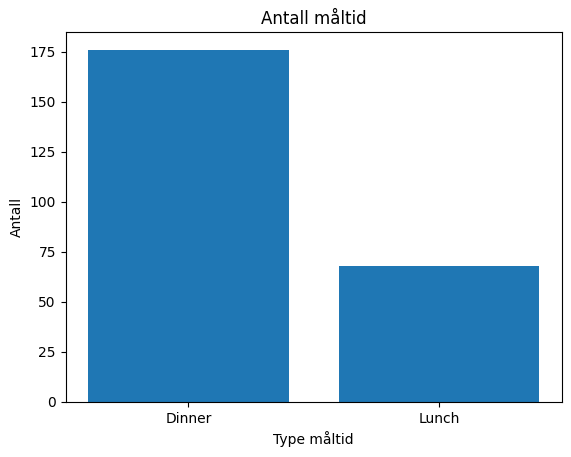

In [27]:
import matplotlib.pyplot as plt
# df['time'].value_counts().plot(kind='bar') # "Ein-linjar" for å lage plottet
# plt.show()

# Ein meir manuell måte å lage det same plottet på:
dinner_count = (df['time'] == 'Dinner').sum()
lunch_count = (df['time'] == 'Lunch').sum()

plt.title('Antall måltid')
plt.ylabel('Antall')
plt.xlabel('Type måltid')
plt.bar(['Dinner', 'Lunch'], [dinner_count, lunch_count])
plt.show()

In [37]:
# Lat oss no finne ut kor stor prosentdel tips utgjer av totalbeløpet

'''
Alternativ 1:
'''

# Beregn prosentandelen av "tip" i forhold til "total_bill"
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100 # NB: Lagrar resultatet i ei ny kolonne

# Vis dei første og siste radene for å bekrefte berekninga
print(df.head())
print()
print(df.tail())
print()

# Berekn gjennomsnittet av prosentandelane
average_tip_percent = df['tip_percent'].mean()
print(f'Gjennomsnittlig tips-prosent: {average_tip_percent:.2f}%')

'''
Alternativ 2:
'''

# Dersom du synes det er unødvendig å lagre resultatet i ei ny kolonne, og vil effektivisere mtp ant linjer:
print()
average_tip_percent = ((df['tip'] / df['total_bill']) * 100).mean()
print(f'Gjennomsnittlig tips-prosent: {average_tip_percent:.2f}%')

'''
Alternativ 3:
NB: Ikkje anbefalt
'''

# Dersom du blir forvirra av korleis Pandas gjer ting over, så KAN du gjere det på ein meir "tradisjonell" måte:
# Bereknar her prosentandelen av "tip" i forhold til "total_bill" med ei eksplisitt løkke
print()
tip_percent_list = []
for i in range(len(df)):
    tip_percent = (df.loc[i, 'tip'] / df.loc[i, 'total_bill']) * 100
    tip_percent_list.append(tip_percent)

# Beregn gjennomsnittet av prosentandelene
average_tip_percent = sum(tip_percent_list) / len(tip_percent_list)
print(f'Gjennomsnittlig tips-prosent: {average_tip_percent:.2f}%')

   total_bill   tip     sex smoker  day    time  size  tip_percent
0       16.99  1.01  Female     No  Sun  Dinner     2     5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3    16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3    16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2    13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4    14.680765

     total_bill   tip     sex smoker   day    time  size  tip_percent
239       29.03  5.92    Male     No   Sat  Dinner     3    20.392697
240       27.18  2.00  Female    Yes   Sat  Dinner     2     7.358352
241       22.67  2.00    Male    Yes   Sat  Dinner     2     8.822232
242       17.82  1.75    Male     No   Sat  Dinner     2     9.820426
243       18.78  3.00  Female     No  Thur  Dinner     2    15.974441

Gjennomsnittlig tips-prosent: 16.08%

Gjennomsnittlig tips-prosent: 16.08%

Gjennomsnittlig tips-prosent: 16.08%


day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64
day
Fri      25.257500
Sat     105.504167
Sun      92.189667
Thur     72.962500
Name: tip_per_person, dtype: float64


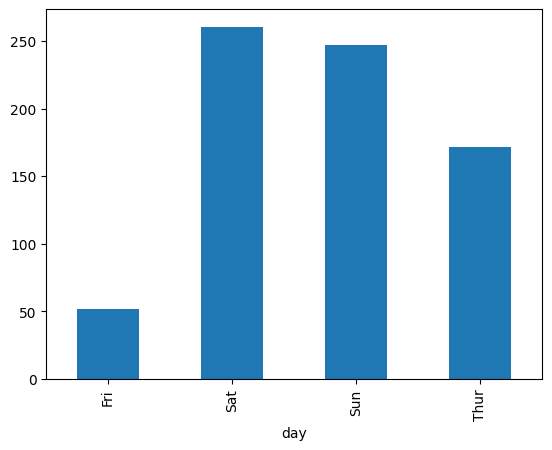

In [ ]:
# Kva dagar er det mest tips på?
tips_per_day = df.groupby('day')['tip'].sum()
print(tips_per_day)

# Plott tips per dag
tips_per_day.plot(kind='bar')

# Kva dagar er det mest tips per person på?
df['tip_per_person'] = df['tip'] / df['size'] # NB: Lagrar resultatet i ei ny kolonne
tips_per_person_per_day = df.groupby('day')['tip_per_person'].sum()
print(tips_per_person_per_day)

In [41]:
df.describe()

,total_bill,tip,size,tip_percent,tip_per_person
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258,1.212762
std,8.902412,1.383638,0.951100,6.107220,0.491705
min,3.070000,1.000000,1.000000,3.563814,0.400000
25%,13.347500,2.000000,2.000000,12.912736,0.862500
50%,17.795000,2.900000,2.000000,15.476977,1.107500
75%,24.127500,3.562500,3.000000,19.147549,1.500000
max,50.810000,10.000000,6.000000,71.034483,3.333333
